# RESEARCH: <font color="#C70039">Momentary Frequency Estimator</font>

* Author: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Start implementation: 26-11-2020
* Description: Computation of the momentary frequency of a given signal s

TODOS
* port to matlab code for being integrated into the AdAnalyzer Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data in directory
data_in_folder = "./data/" 

In [3]:
######################################################
# TESTE MIT KÜNSTLICHEM SINUS SIGNAL
######################################################
#'''
# works with an artifically generated signal which is a sine function with three different frequencies.
# read the signal
infile = "signal"

df_signal=pd.read_csv(data_in_folder + infile + ".csv", header=None)

#print(df_signal.head())
#print(type(df_signal))
#df_signal.rename(columns={0:'huhu'}, inplace=True)
#print(type(df_signal))
#print(df_signal.head())
#'''

In [4]:
######################################################
# TESTE MIT EEG DATEN
######################################################
'''
# take a real EEG of a test person with all electrodes 
infile = "EEG-testperson"

df_signal=pd.read_csv(data_in_folder + infile + ".csv", sep=";", nrows=75000,
                      usecols=['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4'])

print(df_signal.head())
'''

'\n# take a real EEG of a test person with all electrodes \ninfile = "EEG-testperson"\n\ndf_signal=pd.read_csv(data_in_folder + infile + ".csv", sep=";", nrows=75000,\n                      usecols=[\'AF3\',\'F7\',\'F3\',\'FC5\',\'T7\',\'P7\',\'O1\',\'O2\',\'P8\',\'T8\',\'FC6\',\'F4\',\'F8\',\'AF4\'])\n\nprint(df_signal.head())\n'

Visualize the signal

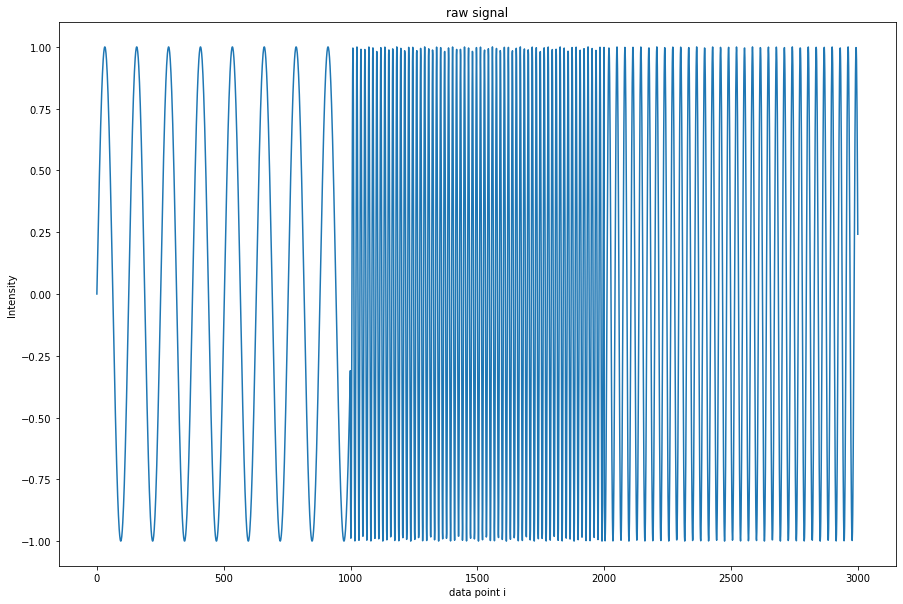

In [5]:
plt.figure(figsize=(15,10))
plt.plot(df_signal)
plt.title('raw signal')
plt.ylabel('Intensity')
plt.xlabel('data point i')
plt.show()

Vergleichsoperatoren:
* #define K(x,y) ((x) < (y) ? 0:1) --- ergibt 0, wenn x kleiner ist als y und sonst 1
* #define W(x,y) ((x) != (y) ? 1:0)--- ergibt 1, wenn x ungleich y ist und sonst 0

In [6]:
# important 
def K(x,y):
    if x < y:
        return 0
    else:
        return 1
    
def W(x,y):
    if x != y:
        return 1
    else:
        return 0

In [7]:
def mean_operator(datapoint, oldMeanValue, adaption_const):
    newMeanValue = 0.0
  
    newMeanValue = oldMeanValue + adaption_const * (datapoint - oldMeanValue)
  
    return newMeanValue

# this is the core of the frequency estimator together with the function above (mean_operator)
def frequency_estimation(signalData, tMean, tFreq):
    sig_len = len(signalData)
    resultFreq = []
    mean1=mean2=mean3 = 0.0
    
    for i in range(2, sig_len):
        mean1 = mean_operator(signalData[i], mean1, tMean)
        
        # check with the "bigger"-operator
        k1 = K(mean1, signalData[i-1])

        mean2 = mean_operator(signalData[i-1], mean2, tMean)
        
        # check with the "bigger"-operator
        k2 = K(mean2, signalData[i-2])

        # check with the "equal"-operator
        w = W(k1,k2)
        
        mean3 = mean_operator(w, mean3, tFreq)
        
        # Just count half of the zero-crossings => /2
        resultFreq.append(mean3/2)
    
    return resultFreq

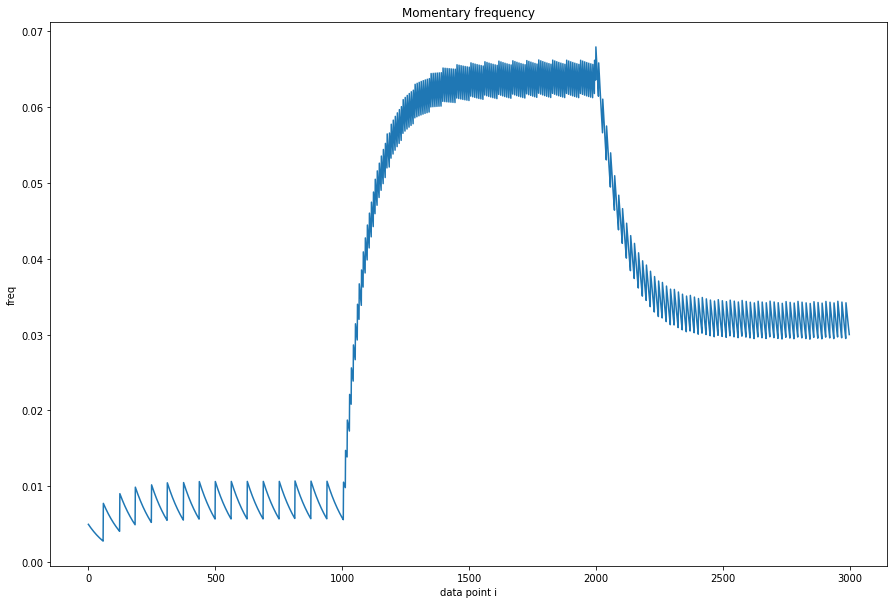

In [8]:
######################################################
# TESTE MIT EEG DATEN
######################################################
# just take one of the electrodes in case you test with EEG data
#df_signal_list = df_signal['AF3'].values.tolist()
#resultFreq = frequency_estimation(df_signal_list, 0.1, 0.01)

######################################################
# TESTE MIT KÜNSTLICHEM SINUS SIGNAL
######################################################
# if you test with the sine signal then use this line here
df_signal_list = df_signal[0].values.tolist()
resultFreq = frequency_estimation(df_signal_list, 0.005, 0.01)

plt.figure(figsize=(15,10))
plt.plot(resultFreq)
plt.title('Momentary frequency')
plt.ylabel('freq')
plt.xlabel('data point i')
plt.show()

smoothing the signal by simple averaging

Nachteil: DAs geglättet Signal hängt hinterher und sieht es aus, als würde der Transientenzeitpunkt später eintreten, da die  Momentanfrequenz später reagiert. 

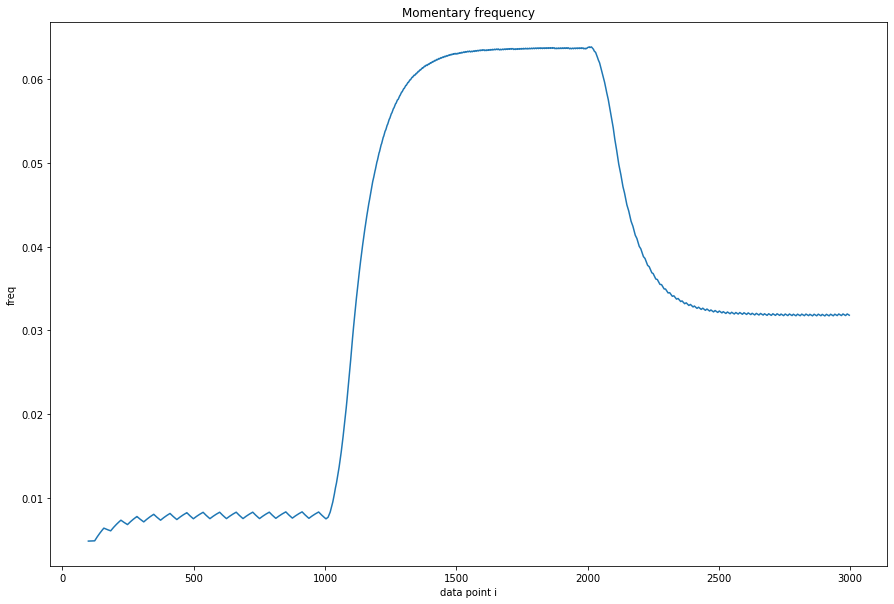

In [9]:
from pandas import DataFrame

smooth_freq = DataFrame(resultFreq)
smooth_freq_mean = smooth_freq.mean()

plt.figure(figsize=(15,10))
ax = plt.plot(smooth_freq.rolling(100).mean())

######################################################
# TESTE MIT EEG DATEN dann Zeile auskommentieren
# hilfreiche horizontale Linie
######################################################
#plt.hlines(y=smooth_freq_mean, xmin=0, xmax=75000, color='r')

plt.title('Momentary frequency')
plt.ylabel('freq')
plt.xlabel('data point i')
plt.show()